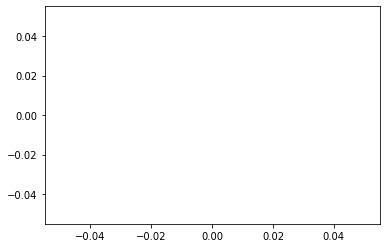

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from IPython.display import display, Markdown, Latex
import pickle

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.plot()

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)


from utils import LeisureSate, get_random_prob

In [2]:
prob = LeisureSate()

In [3]:
display(Latex(prob.general_setup()))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

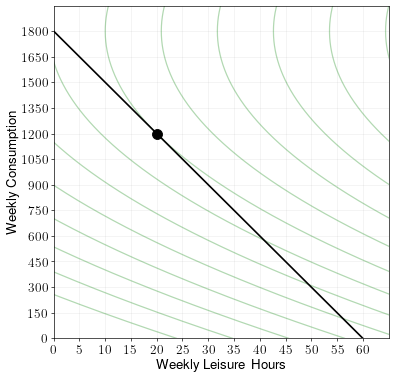

{'c': 1200.0, 'l': 20.0, 'h': 40.0, 'U': 1800000.0}

In [4]:
display(Latex(prob.setup()))
prob.graph_with_IC(show=True, with_solution=True)
prob.sol

In [5]:
examples = []
n_found = 0
for w in np.arange(15,80,5):
    for cmax in np.array([60,90,120])*w:
        for h in np.arange(10,50,5):
            a = cmax
            b = a*w - h*w**2
            params = {'a':a,'b':b,'w':w,'cmax':cmax}
            prob = LeisureSate(params)
            if prob.check_solution():
                n_found+=1
                examples.append( prob.params | prob.sol )
                if (n_found%1000==0):
                    print(f"{n_found} examples found...")
examples = pd.DataFrame.from_dict(examples)
examples = examples.drop_duplicates()
examples.to_csv("LeisureSate_examples.csv", index=False, header=True)
print(f"{len(examples)} examples found.")

243 examples found.


<IPython.core.display.Latex object>

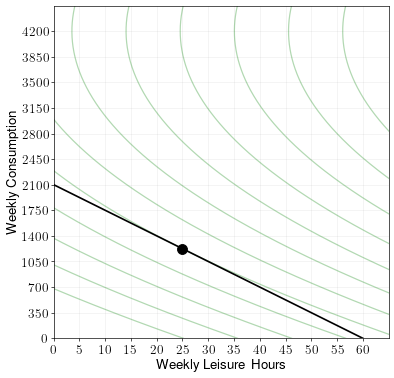

True

In [14]:
prob = get_random_prob(LeisureSate, "LeisureSate_examples.csv")
display(Latex(prob.setup()))
prob.graph_with_IC(show=True, with_solution=True)

In [7]:
examples

,a,b,w,cmax,c,l,h,U
0,900,11250,15,900,150.0,50.0,10.0,686250.0
1,900,10125,15,900,225.0,45.0,15.0,632812.5
2,900,9000,15,900,300.0,40.0,20.0,585000.0
3,900,7875,15,900,375.0,35.0,25.0,542812.5
4,900,6750,15,900,450.0,30.0,30.0,506250.0
...,...,...,...,...,...,...,...,...
238,9000,534375,75,9000,1875.0,35.0,25.0,33820312.5
239,9000,506250,75,9000,2250.0,30.0,30.0,32906250.0
240,9000,478125,75,9000,2625.0,25.0,35.0,32132812.5
241,9000,450000,75,9000,3000.0,20.0,40.0,31500000.0
